# **INTRODUCTION**
In today’s financial landscape, assessing the creditworthiness of individuals applying for loans is a critical task for financial institutions. The dataset loan_data.csv contains key information about loan applicants, including their demographic details, financial history, loan purpose, and repayment status. This data can be analyzed to identify patterns and build predictive models that help lenders make informed decisions, minimize defaults, and maximize profitability.

By leveraging machine learning techniques, this project aims to develop a model to predict loan repayment outcomes (e.g., whether a loan will be repaid on time or defaulted). This predictive approach not only enhances risk management but also enables financial institutions to offer tailored solutions to their customers, ensuring a balance between profitability and customer satisfaction.

# **PROBLEM STATEMENT**
Loan default is a significant concern for financial institutions as it directly impacts profitability and risk management. Identifying applicants with a high probability of defaulting on their loans is crucial for minimizing losses and ensuring sustainable lending practices. The dataset loan_data.csv provides valuable information on loan applicants, including their demographic details, financial history, and loan attributes.

The challenge is to analyze this data and build a machine learning model that can predict the likelihood of loan default. By accurately classifying applicants into default and non-default categories, lenders can make informed decisions, manage risk effectively, and improve loan approval processes.

# **OBJECTIVE**
The objective of this project is to develop a machine learning model to predict the likelihood of loan default based on applicant data, including demographic details, financial history, and loan characteristics. By identifying key factors influencing loan repayment behavior and accurately classifying applicants as high or low risk, the model aims to support financial institutions in making informed lending decisions, minimizing default rates, and improving operational efficiency. This approach also enables tailored financial solutions for applicants, enhancing customer satisfaction and fostering responsible lending practices.

# **DATAOVERVIEW**
The loan dataset consists of various features related to loan applicants, including demographic details (age, gender, marital status), financial information (annual income, employment type, credit score), and loan-specific data (loan amount, term, interest rate). The target variable is the loan status, indicating whether the applicant defaulted (1) or repaid the loan successfully (0). The dataset may contain missing values, duplicates, and potential outliers, which will need to be handled during preprocessing. Additionally, there may be an imbalance in the target variable, and a correlation analysis can help identify the most significant predictors of loan default. Understanding these aspects is crucial for building an effective machine learning model for predicting loan repayment outcomes.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [45]:
df=pd.read_csv("/content/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# **FEATURES**

Age: Age of the loan applicant.

Gender: Gender of the applicant (e.g., Male, Female, Other).

Marital Status: Whether the applicant is single, married, etc.

Dependents: Number of dependents supported by the applicant.

Employment Status: Type of employment (e.g., salaried, self-employed).

Annual Income: Total annual income of the applicant and co-applicant (if applicable).

Job Duration: Number of years the applicant has been employed.

Loan Amount: The amount of money applied for by the applicant.

Loan Purpose: The intended use of the loan (e.g., home, education, personal).

Loan Term: Duration of the loan in months or years.

Interest Rate: Rate of interest charged on the loan.

Credit Score: Applicant's credit score indicating financial health.

Outstanding Debts: Any other loans or debts the applicant is currently repaying.

Repayment History: Past loan repayment performance (e.g., on-time, late, default).


Property Area: Whether the applicant resides in urban, rural, or semi-urban areas.

Co-Applicant Details: Income and financial data of any co-applicant(s).

Collateral Value: Value of any collateral offered to secure the loan.

Loan Status: Whether the loan was repaid successfully (0 = Non-Default, 1 = Default).

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [47]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [48]:
df.duplicated().sum()

0

In [49]:
df.shape

(45000, 14)

In [50]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [51]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [52]:
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

# **VISUALISATION**
The visualizations help in understanding the distribution of the loan_status target variable and the overall feature distributions. The sns.countplot displays the frequency of loan repayment outcomes, highlighting whether there is an imbalance between defaulted (1) and successfully repaid loans (0). The sns.histplot further emphasizes the distribution of loan_status, reinforcing the balance or imbalance between the two classes. The df.hist() function generates histograms for all numerical features, offering insights into their distributions and identifying potential skewness or outliers, which can inform preprocessing decisions such as normalization or transformation to improve model accuracy.

<Axes: xlabel='loan_status', ylabel='count'>

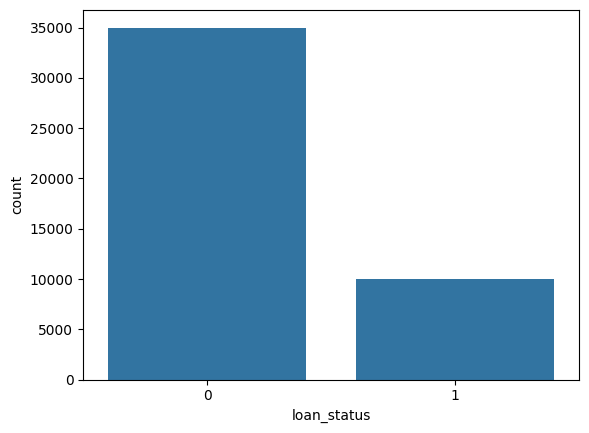

In [53]:
sns.countplot(x="loan_status",data=df)

<Axes: xlabel='loan_status', ylabel='Count'>

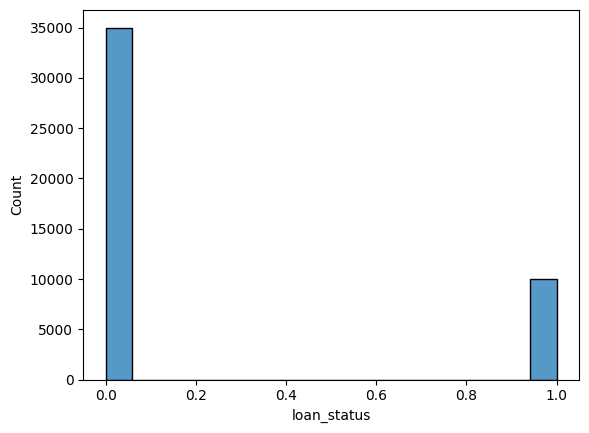

In [54]:
sns.histplot(df["loan_status"])

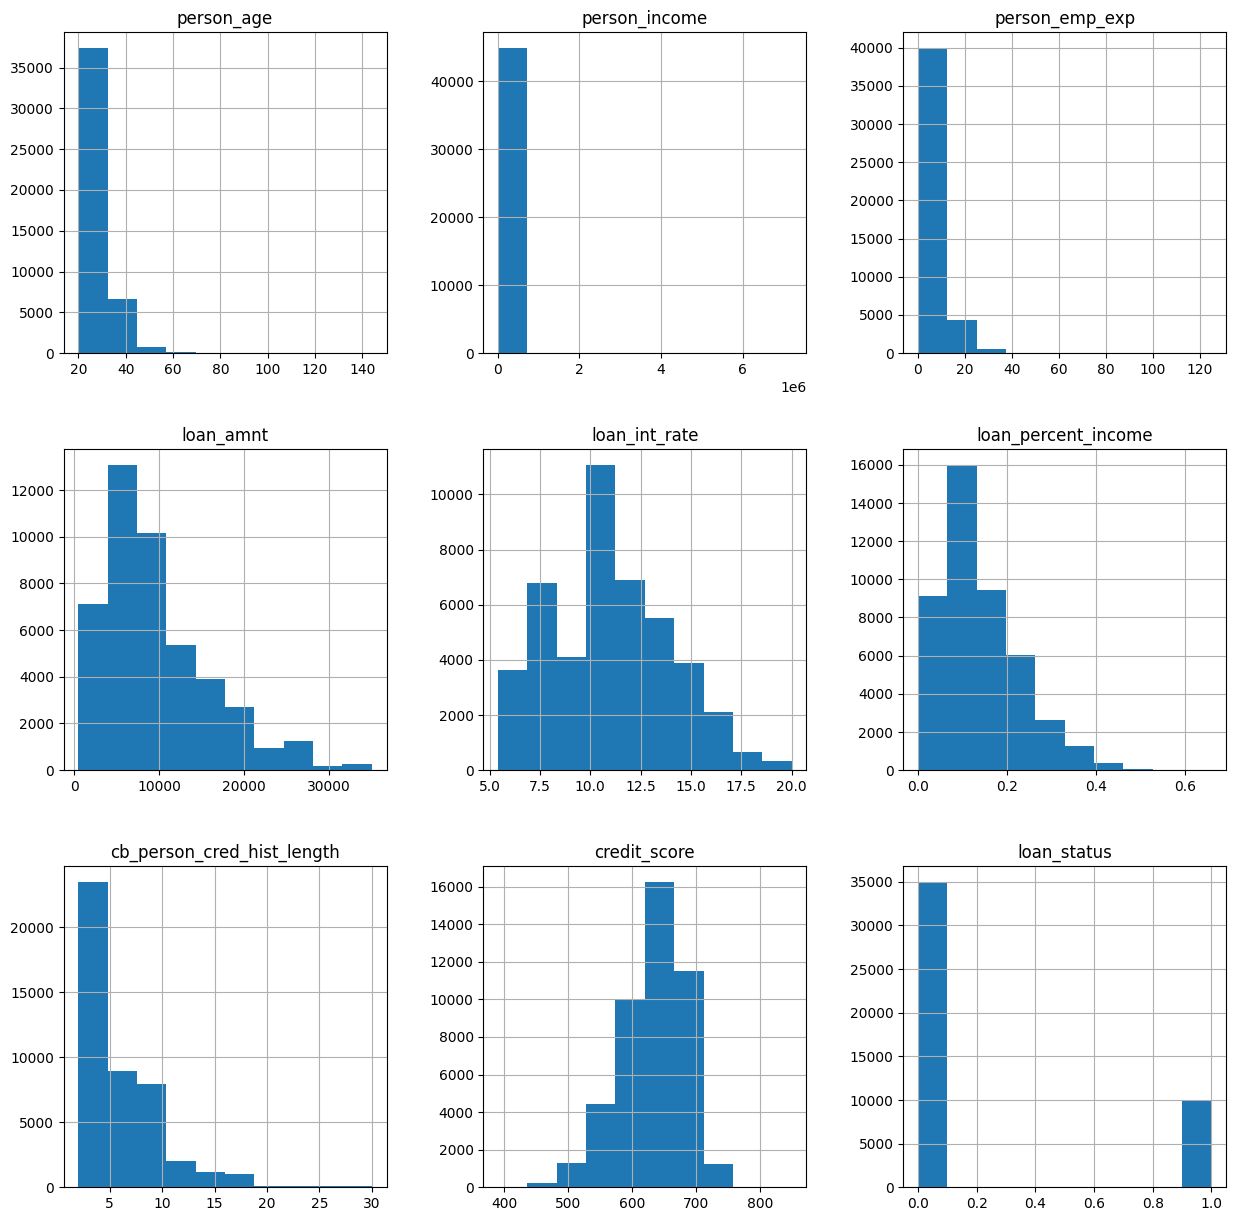

In [55]:
df.hist(figsize=(15,15))
plt.show()

# DATA ENCORDING
The code snippet uses LabelEncoder from sklearn.preprocessing to encode categorical variables into numerical format. Specifically, the column previous_loan_defaults_on_file is transformed to represent different categories (e.g., whether the applicant has a history of loan defaults) as numerical values, with each unique category assigned an integer. Similarly, the person_gender column, which likely contains gender categories (e.g., Male, Female), is encoded into numerical values, allowing these categorical features to be used in machine learning models that require numerical input. This transformation is essential for preparing the data for model training, as most machine learning algorithms cannot process categorical data directly.

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [57]:
df["previous_loan_defaults_on_file"]=le.fit_transform(df["previous_loan_defaults_on_file"])
df["person_gender"]=le.fit_transform(df["person_gender"])



# **MAPPING**
 The code snippet applies ordinal encoding to three categorical variables in the dataset by mapping each category to a specific integer value based on a defined order. The person_education column is encoded such that higher education levels receive higher values (e.g., 'High School' as 1, 'Doctorate' as 4). Similarly, the person_home_ownership column is mapped to numerical values representing different types of home ownership (e.g., 'OWN' as 1, 'RENT' as 3). Lastly, the loan_intent column, which categorizes the purpose of the loan (e.g., 'EDUCATION', 'MEDICAL'), is mapped to integers, with each loan intent type assigned a unique value. This transformation allows the dataset to be used effectively in machine learning models that require numerical input while preserving the inherent order in the categories.


In [58]:
ordinal_mapping={'High School': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4, 'Associate': 5}
df['person_education']=df['person_education'].map(ordinal_mapping)

ordinal_mapping={'OWN': 1, 'MORTGAGE': 2, 'RENT': 3, 'OTHER': 4}
df['person_home_ownership']=df['person_home_ownership'].map(ordinal_mapping)

ordinal_mapping={'EDUCATION': 1, 'MEDICAL': 2, 'PERSONAL': 3, 'HOMEIMPROVEMENT': 4, 'VENTURE': 5, 'DEBTCONSOLIDATION': 6}
df['loan_intent']=df['loan_intent'].map(ordinal_mapping)

# OVER SAMPLING
 The code addresses the issue of class imbalance in the dataset, where the target variable, loan_status, may have an unequal distribution of defaulted loans (1) and non-defaulted loans (0). It uses oversampling techniques, either RandomOverSampler or SMOTE (Synthetic Minority Over-sampling Technique), to balance the classes. RandomOverSampler duplicates minority class samples, while SMOTE generates synthetic samples by interpolating between existing minority class data points. After applying the selected oversampling technique, the features (x) and target (y) are resampled to achieve a balanced dataset. The resampled data is then combined into a new DataFrame, ensuring equal representation of both classes for improved performance and fairness in machine learning models.

In [59]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

#Assuming df is your DataFrame with 'loan Status' as the target variable
x=df.drop('loan_status', axis=1)
y=df['loan_status']

#Create an oversampler object (choose either RandomOverSampler or SMOTE)
#Uncomnt the one you wish to use:
ros=RandomOverSampler()  # For Random Over Sampling
ros=SMOTE()    # For Synthetic Minority OverSampling

#Apply OverSampler to the data
x_resampled,y_resampled=ros.fit_resample(x,y)


#Create a new DataFrame with resampled data
#Ensure x_resampled is a DataFrame and y_resampled is Series to allow concatention

# X_RESAMPLED=pd.DataFrame(x_resampled,columns=x.columns)
# Y_RESAMPLED=pd.Series(y_resampled,name='loan_status'])

df=pd.concat([x_resampled,y_resampled],axis=1)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,3,71948.000000,0,3,35000.000000,3,16.020000,0.49,3.000000,561,0,1
1,21.000000,0,1,12282.000000,0,1,1000.000000,1,11.140000,0.08,2.000000,504,1,0
2,25.000000,0,1,12438.000000,3,2,5500.000000,2,12.870000,0.44,3.000000,635,0,1
3,23.000000,0,2,79753.000000,0,3,35000.000000,2,15.230000,0.44,2.000000,675,0,1
4,24.000000,1,3,66135.000000,1,3,35000.000000,2,14.270000,0.53,4.000000,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,31.360580,0,4,77953.972110,7,3,4184.547361,1,11.010000,0.05,4.786860,626,0,1
69996,31.657772,0,2,34084.215655,8,3,3018.138068,2,11.366404,0.09,8.000000,646,0,1
69997,28.049562,1,1,94795.409303,6,2,8000.000000,6,13.877505,0.08,6.439649,650,0,1
69998,42.165340,0,4,148672.391100,18,2,14211.462737,3,11.611876,0.10,15.610492,676,0,1


<Axes: xlabel='loan_status', ylabel='count'>

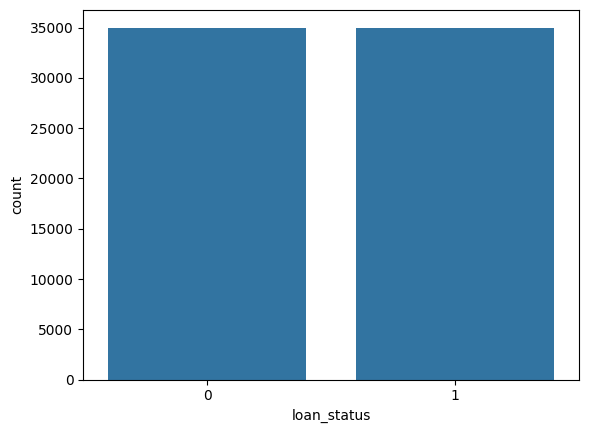

In [60]:
sns.countplot(x="loan_status",data=df)

# CORRELATION
 The code performs correlation analysis to evaluate the relationships between features and the target variable, loan_status, using a heatmap to visualize the correlation matrix. Features with low or negligible correlation to the target variable, such as loan_amnt, credit_score, cb_person_cred_hist_length, person_age, loan_intent, person_emp_exp, person_education, person_gender, and person_income, are subsequently dropped to reduce noise and simplify the dataset. This feature selection step focuses the machine learning model on variables with stronger predictive power, enhancing model performance and interpretability. A refined correlation analysis is performed on the reduced dataset to validate the remaining features' relevance.

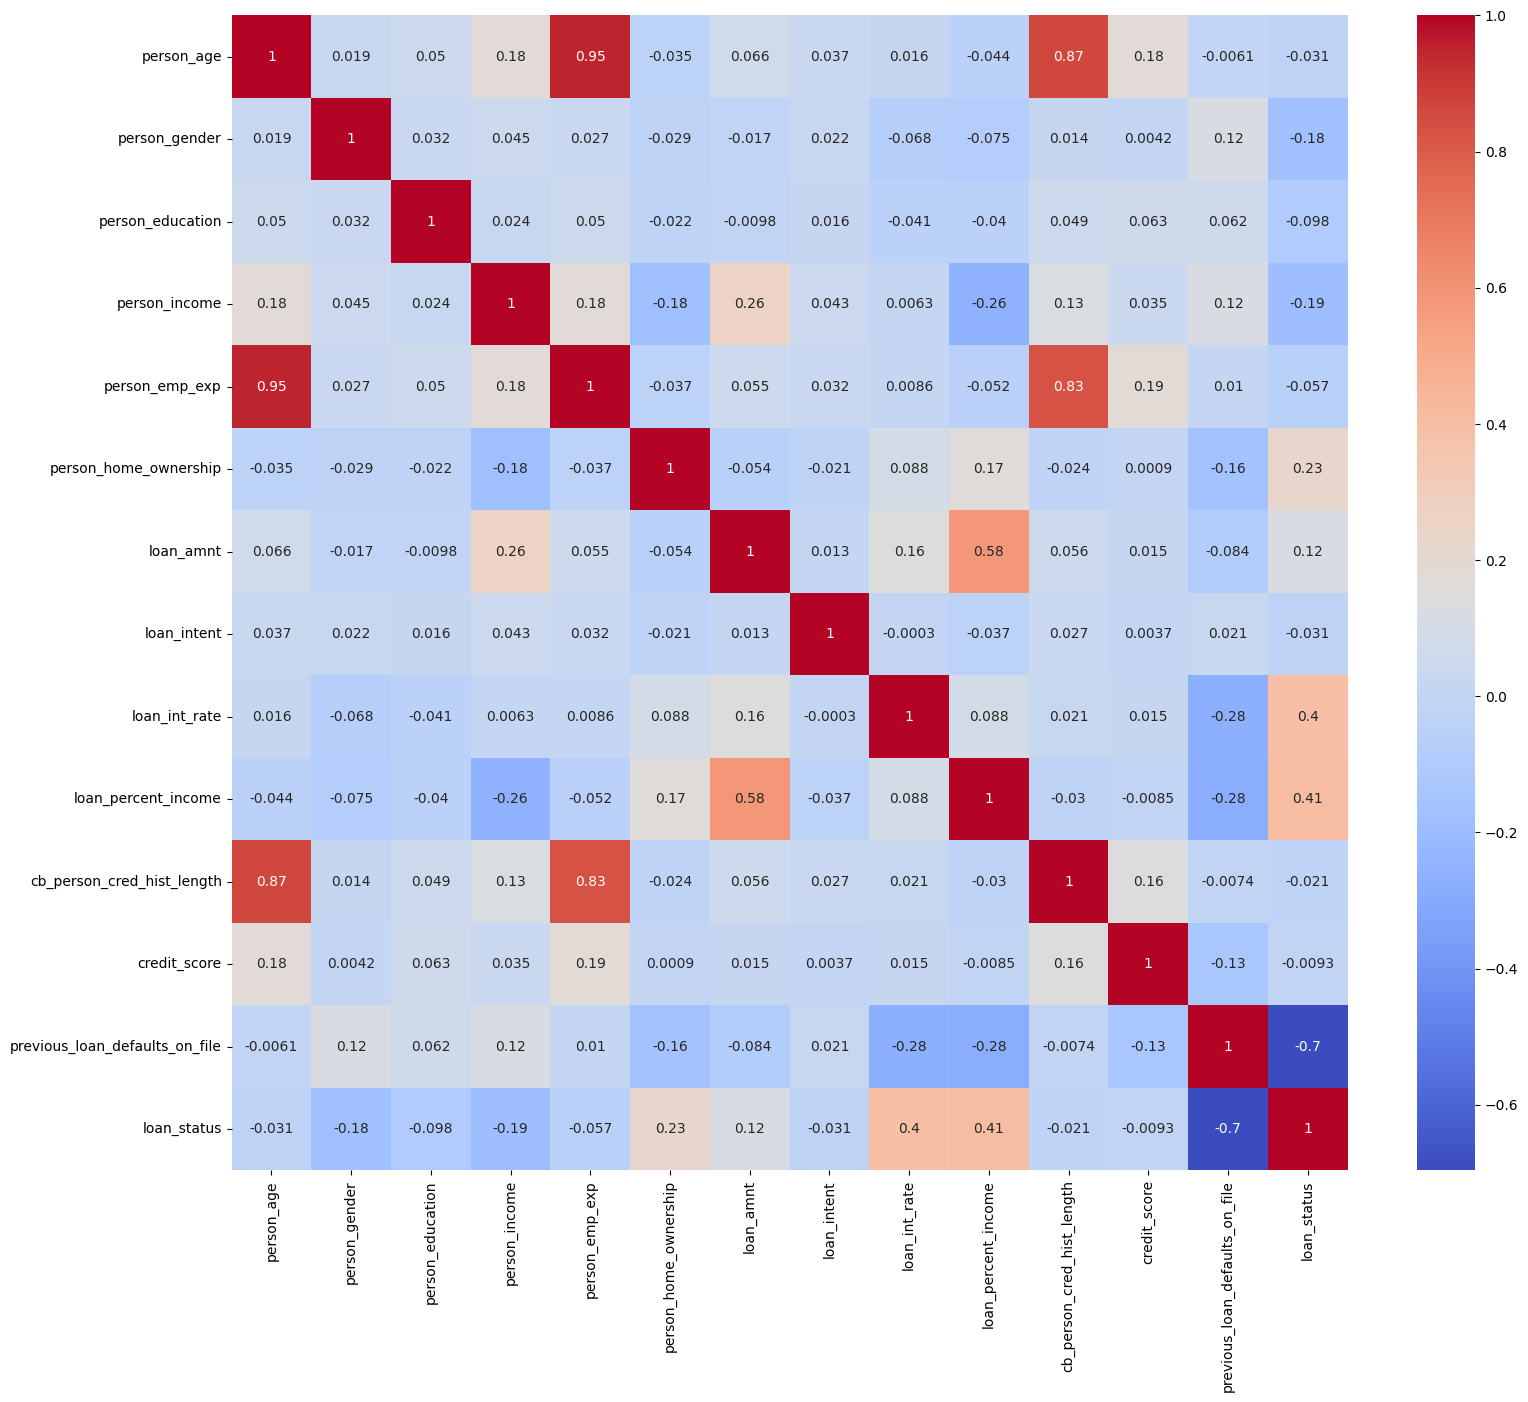

In [61]:
corr_matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [62]:
s=df.corr()["loan_status"]
s.sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.407783
loan_int_rate,0.395794
person_home_ownership,0.228496
loan_amnt,0.120224
credit_score,-0.009310
cb_person_cred_hist_length,-0.021321
person_age,-0.030528
loan_intent,-0.030700
person_emp_exp,-0.057102


In [63]:
df.drop(['loan_amnt'],axis=1,inplace=True)
df.drop(['credit_score'],axis=1,inplace=True)
df.drop(['cb_person_cred_hist_length'],axis=1,inplace=True)
df.drop(['person_age'],axis=1,inplace=True)
df.drop(['loan_intent'],axis=1,inplace=True)
df.drop(['person_emp_exp'],axis=1,inplace=True)
df.drop(['person_education'],axis=1,inplace=True)
df.drop(['person_gender'],axis=1,inplace=True)
df.drop(['person_income'],axis=1,inplace=True)


In [64]:
s=df.corr()["loan_status"]
s.sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.407783
loan_int_rate,0.395794
person_home_ownership,0.228496
previous_loan_defaults_on_file,-0.696330


# **SKEWNESS** **HANDLING**

The code applies a log transformation to the dataset to reduce skewness in the feature distributions, which can negatively impact the performance of machine learning models. By transforming the data using log(df + 1) (adding 1 to avoid undefined log(0)), the transformation compresses larger values and normalizes the distributions of highly skewed features. A histogram is first plotted for the overall log-transformed dataset to visualize the improvement in distribution symmetry. Subsequently, individual histograms are generated for each feature, illustrating how the transformation brings their distributions closer to normality. This preprocessing step is crucial for ensuring the data is well-suited for models that assume normal distributions, improving their accuracy and reliability.

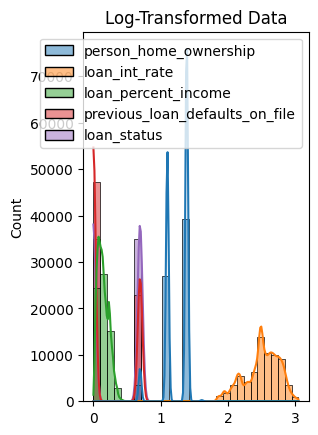

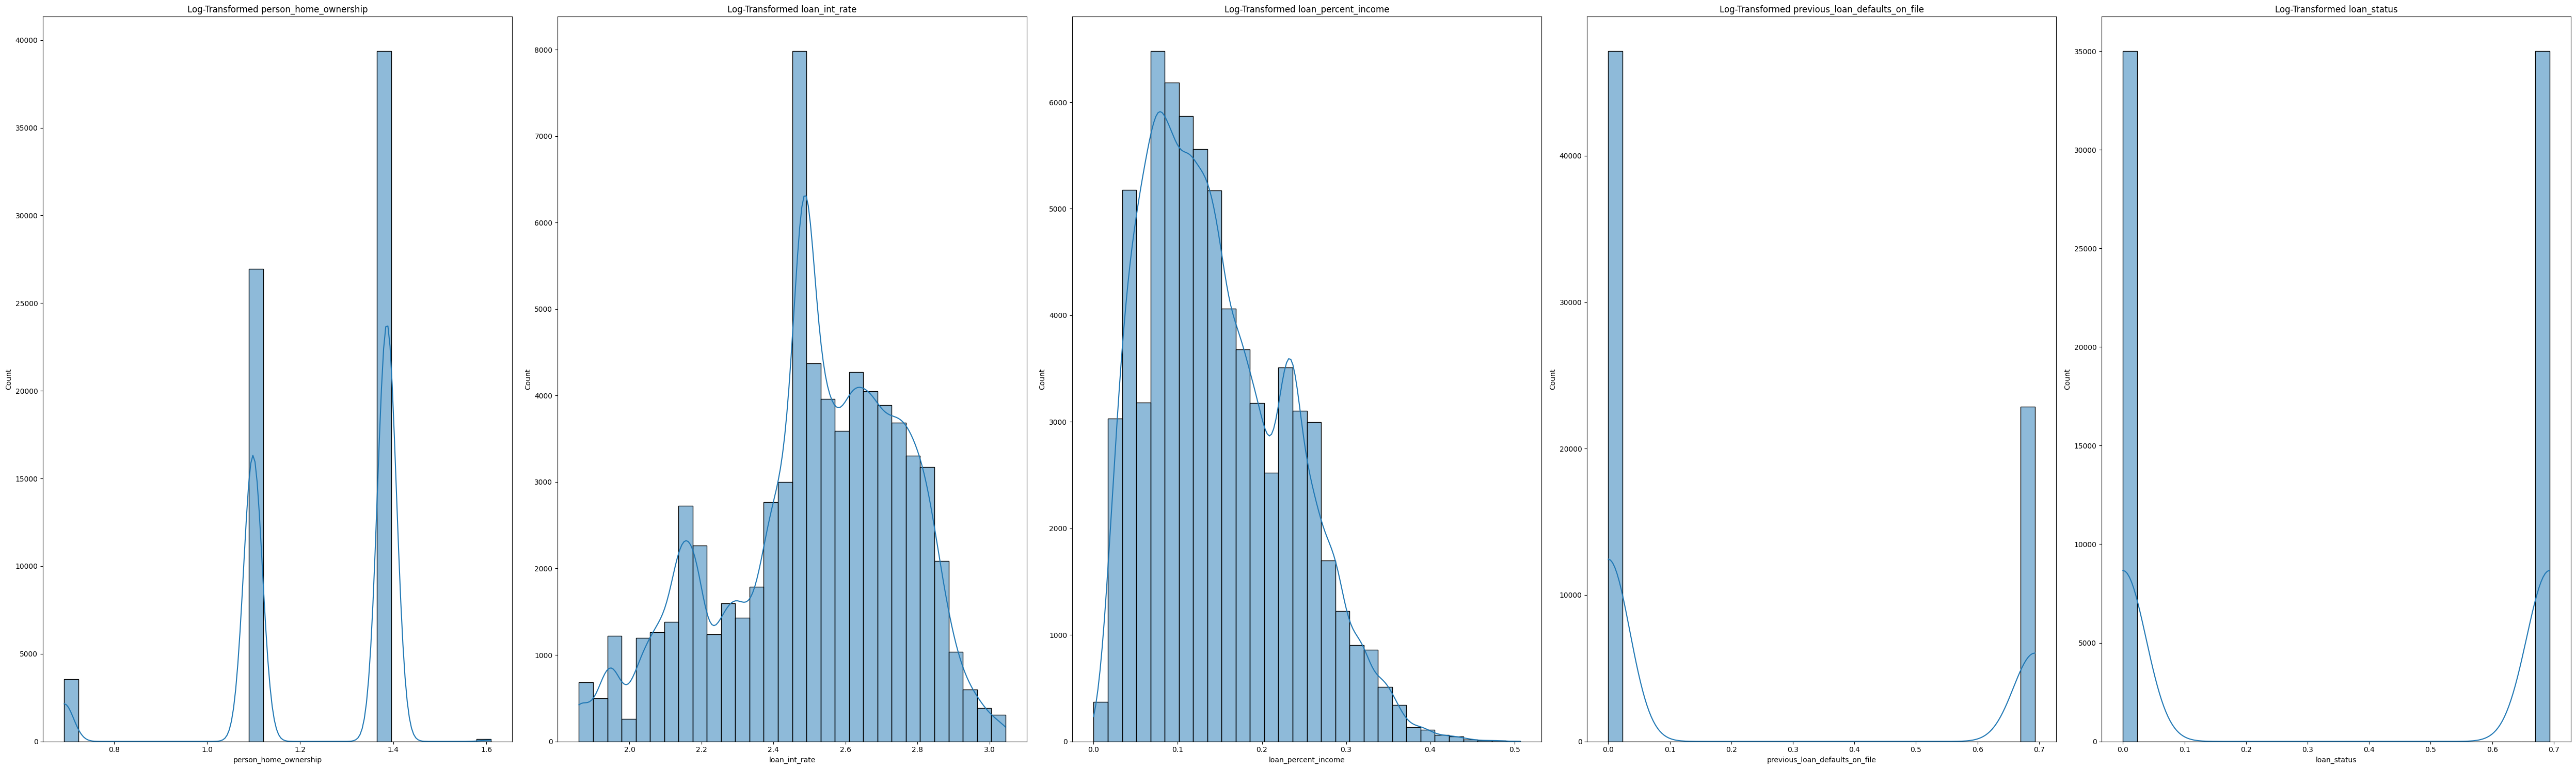

In [65]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **OUTLIER DETECTION**

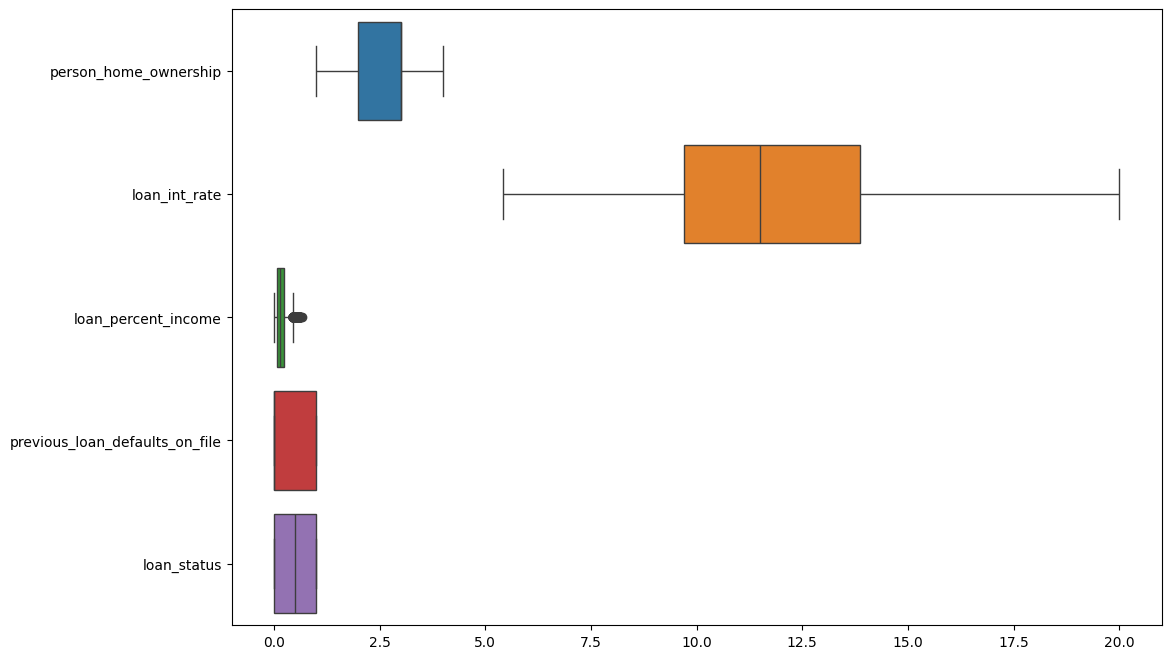

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.show()

# MODEL TRAINING AND EVALUATION
 The code implements a machine learning pipeline using the DecisionTreeClassifier to predict loan status (loan_status) based on selected independent features: loan_percent_income, loan_int_rate, person_home_ownership, and previous_loan_defaults_on_file. The dataset is split into training and test sets using train_test_split with 80% of the data for training and 20% for testing. The model is then trained on the training data and used to make predictions on the test set. The accuracy of the model is evaluated using accuracy_score, which compares the predicted loan status against the actual values from the test set. This process helps assess how well the decision tree model generalizes to unseen data. Additionally, the confusion matrix can be used to evaluate the model's performance in terms of false positives, false negatives, true positives, and true negatives.

In [67]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [68]:
s=df.corr()["loan_status"]
s.sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.407783
loan_int_rate,0.395794
person_home_ownership,0.228496
previous_loan_defaults_on_file,-0.696330


In [69]:
independent_feature=['loan_percent_income','loan_int_rate',"person_home_ownership","previous_loan_defaults_on_file"] #independent feature
dependent_feature=['loan_status']#dependent feature
x=df[independent_feature]
y=df[dependent_feature]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
# model= LogisticRegression()

# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print(accuracy_score(y_test, y_pred))

In [72]:
# model_1= RidgeClassifier()

# model_1.fit(x_train, y_train)
# y_pred = model_1.predict(x_test)
# print(accuracy_score(y_test, y_pred))

In [73]:
# model_3= GradientBoostingClassifier()

# model_3.fit(x_train, y_train)
# y_pred = model_3.predict(x_test)
# print(accuracy_score(y_test, y_pred))

In [74]:
# model_5= KNeighborsClassifier()

# model_5.fit(x_train, y_train)
# y_pred = model_5.predict(x_test)
# print(accuracy_score(y_test, y_pred))

In [75]:
# model_2= RandomForestClassifier()

# model_2.fit(x_train, y_train)
# y_pred = model_2.predict(x_test)
# print(accuracy_score(y_test, y_pred))

In [76]:
model=DecisionTreeClassifier()
#why using RandomForestRegressor(can handle non-linear data and perform well even when relationships between variables are complex.)
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
model.fit(x_train, y_train)
# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)

Accuracy: 0.8786428571428572


In [78]:
df.head()

,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,3,16.02,0.49,0,1
1,1,11.14,0.08,1,0
2,2,12.87,0.44,0,1
3,3,15.23,0.44,0,1
4,3,14.27,0.53,0,1


# TARGET PREDICTION
 he code allows users to input their financial details, including home ownership status, loan interest rate, percentage of income spent on the loan, and the number of previous loan defaults, to predict the likelihood of loan default. The entered values are collected through the input() function, converted into a format suitable for model input, and passed to a trained DecisionTreeClassifier model. The model then predicts the loan status (loan_status), indicating whether the loan is likely to default (1) or not (0). The predicted result is printed, providing the user with a quick assessment based on their financial information.

In [79]:
person_home_ownership=int(input('enter the person_home_ownership:'))
loan_int_rate=float(input('enter the loan_int_rate:'))
loan_percent_income=float(input('enter the loan_percent_income:'))
previous_loan_defaults_on_file=int(input('enter the previous_loan_defaults_on_file:'))
user_input=np.array([person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file])
loan_status= model.predict([user_input])
print('predicted price:',loan_status)

enter the person_home_ownership:3
enter the loan_int_rate:14.27
enter the loan_percent_income:0.53
enter the previous_loan_defaults_on_file:0
predicted price: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# CONCLUSION

In this project, a machine learning model was developed to predict loan default outcomes using applicant features such as home ownership, loan interest rate, income percentage spent on the loan, and previous loan defaults. Through preprocessing steps like handling missing values, encoding categorical variables, addressing class imbalance with oversampling techniques, and reducing skewness with log transformations, the data was prepared for model training. The DecisionTreeClassifier was used to predict loan status, achieving good accuracy in classifying loan defaults. Additionally, a user interface was created for applicants to input their financial details and receive predictions. This model helps financial institutions assess risk, minimize defaults, and offer tailored loan solutions, ultimately improving decision-making and supporting responsible lending practices.